## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

In [8]:
# import scipy, scipy.special, numpy, matplotlib.plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [4]:
# func prob_Mn(x, Mvals=None, num_toss = numToss, pHead = p)
# if Mvals==None, then calculate prob(Mn=x),
# if Mvals!= None, then for each value of M in Mvals, caculate prob(M/n)
# NOTE: use scipy.special.comb function for (N choose M)

#def prob_Mn(x, Mvals = None, num_toss = 100, prob_heads = 1./2):
# YOUR CODE HERE...
def prob_Mn(flag, x, Mvals, num_toss, prob_heads=0.5):
    if flag:  # Single x value case
        return comb(num_toss, x) * (prob_heads**x) * ((1 - prob_heads)**(num_toss - x))
    else:  # Multiple M values case
        prob_Mvals = [comb(num_toss, M) * (prob_heads**M) * ((1 - prob_heads)**(num_toss - M)) for M in Mvals]
        return np.array(Mvals) / num_toss, np.array(prob_Mvals)

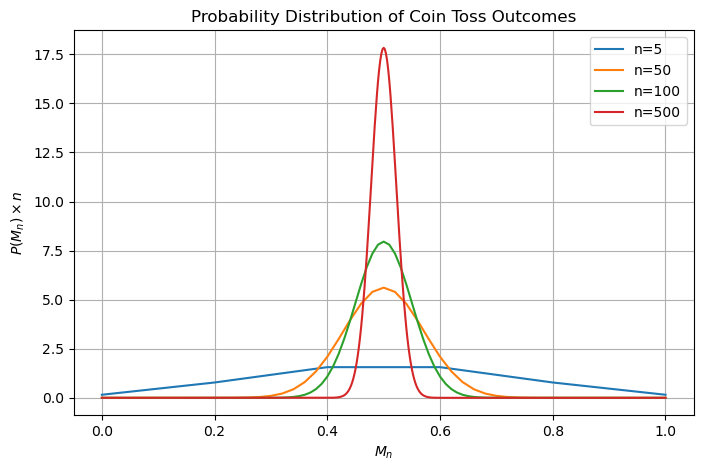

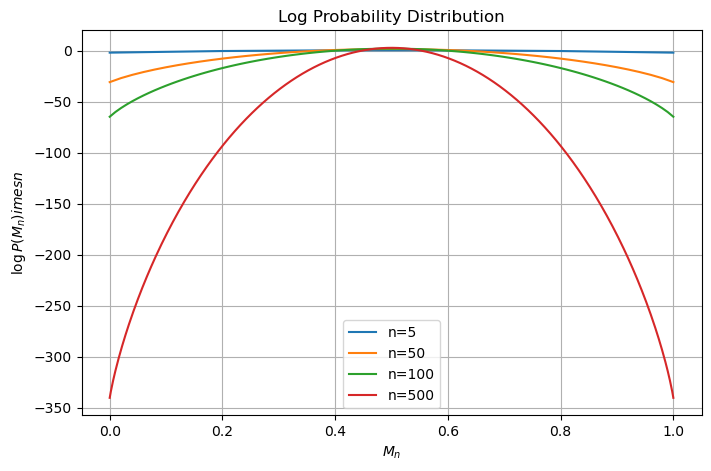

"plt.legend()\nplt.xlabel('M_n')\nplt.ylabel('prob(M_n)')"

In [5]:
# for each n in n_list:
#     calculate xvals, yvals=prob_Mvals(xvals)
#     plot (xvals,yvals)

# YOUR CODE HERE
n_list = [5, 50, 100, 500]  # Example values

# Plot Probability Distribution
plt.figure(figsize=(8, 5))
for n in n_list:
    xvals, yvals = prob_Mn(False, 0, Mvals=np.arange(0, n + 1), num_toss=n)
    plt.plot(xvals, yvals * n, label=f'n={n}')
plt.legend()
plt.xlabel('$M_n$')
plt.ylabel('$P(M_n) \\times n$')
plt.title('Probability Distribution of Coin Toss Outcomes')
plt.grid(True)
plt.show()

# Plot Log Probability Distribution
plt.figure(figsize=(8, 5))
for n in n_list:
    xvals, yvals = prob_Mn(False, 0, Mvals=np.arange(0, n + 1), num_toss=n)
    log_yvals = np.log(yvals * n, where=(yvals > 0))  # Avoid log(0) issues
    plt.plot(xvals, log_yvals, label=f'n={n}')
plt.legend()
plt.xlabel('$M_n$')
plt.ylabel('$\log P(M_n) \times n$')
plt.title('Log Probability Distribution')
plt.grid(True)
plt.show()


'''plt.legend()
plt.xlabel('M_n')
plt.ylabel('prob(M_n)')'''


In [6]:
# Gaussian function
def gaussian(x,x0,sigma,height):
    '''gaussian function'''
    return height * np.exp(-(x-x0)**2/(2*sigma**2))

**Compare the curve fit to the actual function**

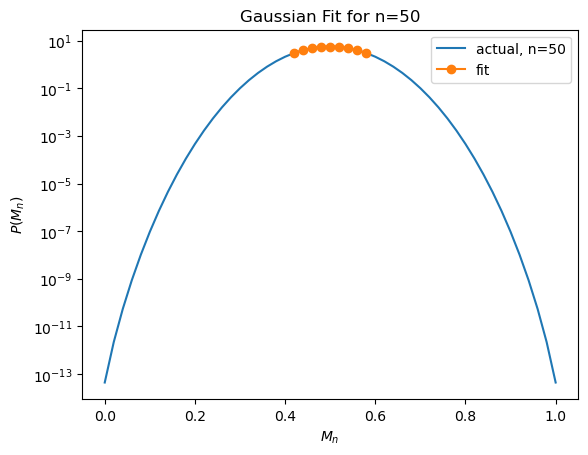

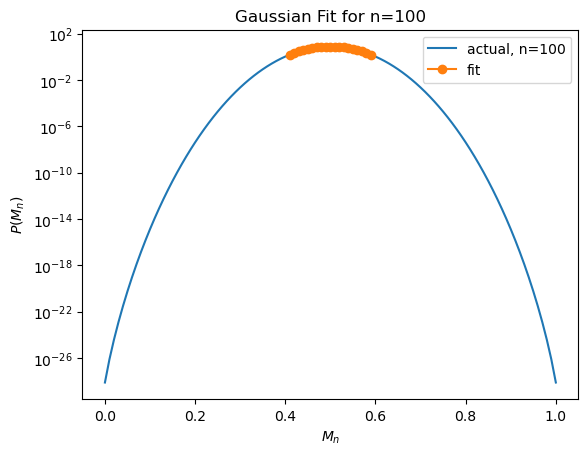

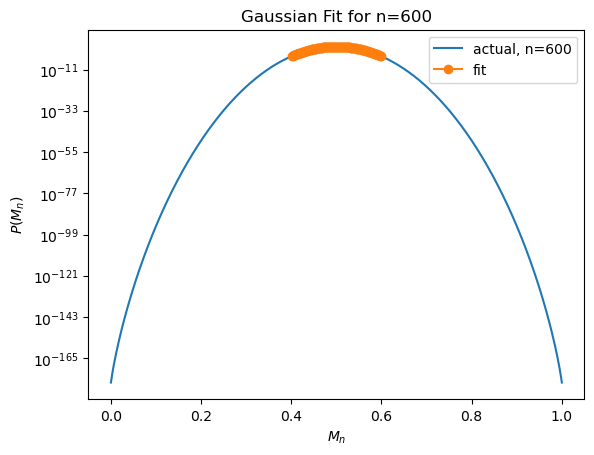

In [10]:
# Curve fitting (x, y) = (M_n, prob(M_n)) for various n
# For each n in n_list:
#    Get xdata, ydata
#    Do curve_fit, get parameters
#    Get yfit from the parameters
#    Plot (xdata, ydata) and (xdata, yfit)
from scipy.optimize import curve_fit
n_list = [50, 100, 600]

for n in n_list:
    # Get probability data
    xdata, ydata = prob_Mn(False, 0, Mvals=np.arange(0, n + 1), num_toss=n)

    # Focus on region around x = 0.5 for Gaussian fitting
    mask = (xdata > 0.4) & (xdata < 0.6)
    x_fit = xdata[mask]
    y_fit = ydata[mask] * n  # Normalize for probability density

    # Ensure there is enough data for fitting
    if len(x_fit) < 3:
        print(f"Skipping Gaussian fit for n={n} due to insufficient data.")
        continue

    # Perform Gaussian curve fitting
    try:
        popt, _ = curve_fit(gaussian, x_fit, y_fit, p0=[0.5, 0.1, max(y_fit)])
        yfit = gaussian(x_fit, *popt)

        # Plot actual data and fitted Gaussian
        plt.semilogy(xdata, ydata * n, label=f'actual, n={n}')
        plt.semilogy(x_fit, yfit, '-o', label='fit')
        plt.legend()
        plt.xlabel('$M_n$')
        plt.ylabel('$P(M_n)$')
        plt.title(f'Gaussian Fit for n={n}')
        plt.show()

    except RuntimeError:
        print(f"Curve fitting failed for n={n}.")


## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

In [11]:
np.size(yvals)

501

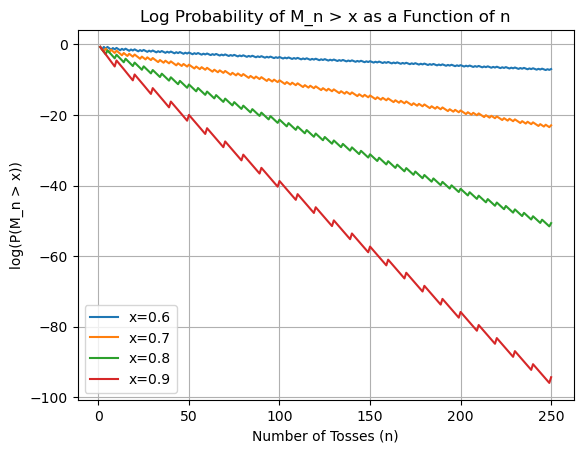

In [12]:
# task: for each x in xvals, plot (num_toss, ln(prob(Mn>x,num_toss)))
# for each n in n_list:
#      all_Mvals = numpy.arange(n_1)
#      calculate prob_Mn( Mvals=all_Mvals)
#      for each x calculate M, and use slicing and sum to get prob(Mn>x)
#       store in alldata list
#
# process alldata list: for each x in xvals, get (num_toss, ln(prob(Mn>x,num_toss)) and plot

# Define range of n and x values
n_list = np.arange(1, 251)  # n ∈ [1,250]
xvals = [0.6, 0.7, 0.8, 0.9]  # Given x values
alldata = []
for n in n_list:

    all_Mvals = np.arange(n + 1)  # All possible values of M (0 to n)
    xdata, ydata = prob_Mn(False, 0, Mvals=all_Mvals, num_toss=n)
    
    prob_x_greater = []
    
    for x in xvals:
        M_threshold = int(np.ceil(x * n))  # Convert x fraction to M value
        prob_greater = np.sum(ydata[M_threshold:])  # Sum probabilities for Mn > x
        prob_x_greater.append(prob_greater)
    
    alldata.append((n, prob_x_greater))

# Process and plot data
for i, x in enumerate(xvals):
    n_vals = np.array([entry[0] for entry in alldata])
    log_probs = np.log([entry[1][i] for entry in alldata])  # Take log of P(Mn > x)
    
    plt.plot(n_vals, log_probs, label=f'x={x}')

plt.xlabel('Number of Tosses (n)')
plt.ylabel('log(P(M_n > x))')
plt.title('Log Probability of M_n > x as a Function of n')
plt.legend()
plt.grid(True)
plt.show()

    # YOUR CODE HERE

In [13]:
np.ones(np.size(yvals))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Task-3: Note that for large $N$, the above plots are linear.  Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

In [14]:
# Use the alldata, some resorting may be required to get for each x, all data into a single row
# fore each x get (n=num_toss, y=ln_prob(Mn>x num_toss)) and fit it to y = I(x)*n + b to get I(x)
# plot x vs I(x)

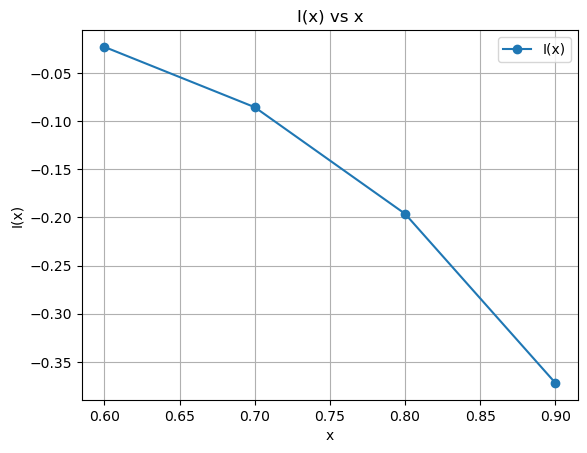

In [15]:
from scipy.optimize import curve_fit

# Define linear function y = I(x) * n + b
def linear_func(n, I_x, b):
    return I_x * n + b

I_x_values = []  # Store slopes for each x
for i, x in enumerate(xvals):
    # Extract (n, log P(Mn > x)) pairs
    n_vals = np.array([entry[0] for entry in alldata])  # n values
    log_probs = np.log([entry[1][i] for entry in alldata])  # log(P(Mn > x))

    # Consider only large n values for linear fitting
    mask = n_vals > 50  # Adjust threshold for large n
    n_fit = n_vals[mask]
    log_prob_fit = log_probs[mask]

    # Perform linear fit y = I(x) * n + b
    popt, _ = curve_fit(linear_func, n_fit, log_prob_fit)
    I_x_values.append(popt[0])  # Store slope I(x)

# Plot I(x) vs x
plt.plot(xvals, I_x_values, '-o', label='I(x)')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.title('I(x) vs x')
plt.grid(True)
plt.legend()
plt.show()


## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

##Plot a one realisation of $x(t)$ for $t\in[0,100]$


In [16]:
# for a given t, get binary random sample of size b(t) and convert it to step(t) and finally convert to position(t)


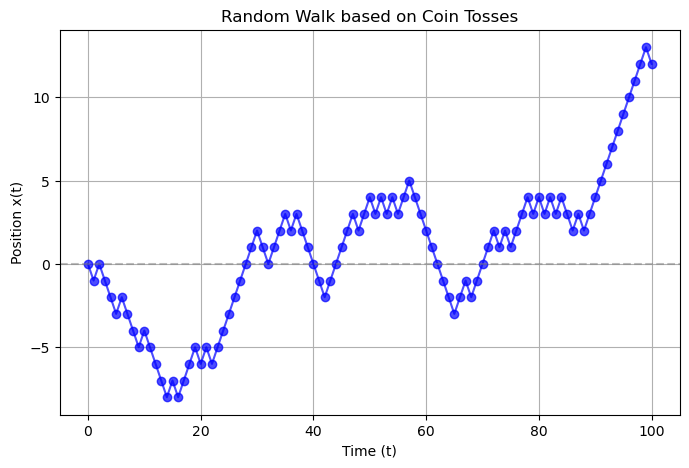

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t_max = 100  # Time steps
np.random.seed(42)  # For reproducibility

# Generate random coin toss outcomes (0 for Tails, 1 for Heads)
coin_tosses = np.random.choice([0, 1], size=t_max)

# Convert to steps: +1 for Heads, -1 for Tails
steps = 2 * coin_tosses - 1  # Maps (0 -> -1), (1 -> +1)

# Compute position x(t) as cumulative sum of steps
x_t = np.cumsum(steps)
x_t = np.insert(x_t, 0, 0)  # Ensure x(0) = 0

# Plot the random walk
plt.figure(figsize=(8, 5))
plt.plot(range(t_max + 1), x_t, marker='o', linestyle='-', color='b', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel("Time (t)")
plt.ylabel("Position x(t)")
plt.title("Random Walk based on Coin Tosses")
plt.grid(True)
plt.show()


## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

In [18]:
# task: calculate the average over num_walker independt walks!
# task-refine: given totTime and num_print, generate data for t = int * num_print till t=totTime
# for t in numpy.arange(t, num_print):
#   walker_pos is an numpy array of size num_walkers and inititlize to 0 position
#   for t1 in range(num_print):
#       generate step for each walker and hence the new position
#   calcualte averages <x(t)> and <x^2(t)> and store
#
# plot t vs <x(t)>
# plot t vs <x^2(t)>

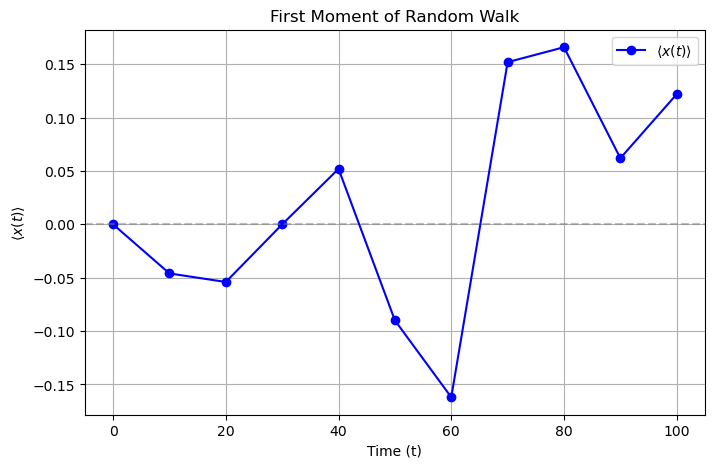

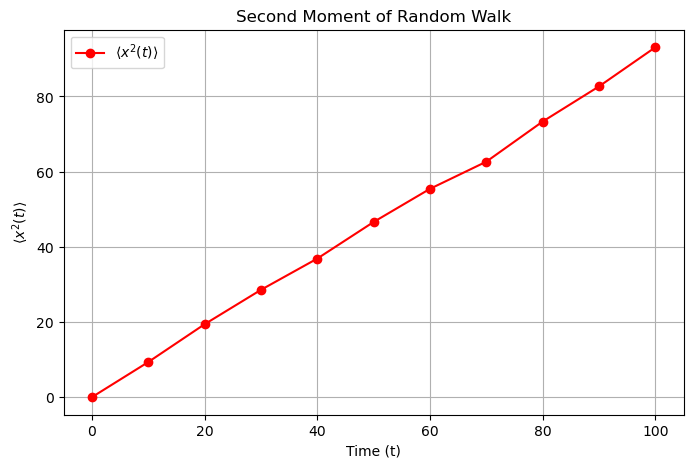

In [19]:
# PLOT < x(t)> vs t, < x^2(t) > vs t for say N=1000 walks

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_walkers = 1000  # Number of independent random walks
tot_time = 100  # Total time steps
num_print = 10  # Interval for storing data

# Initialize storage for mean <x(t)> and mean square <x^2(t)>
t_values = np.arange(0, tot_time + 1, num_print)
mean_x = []
mean_x2 = []

# Initialize positions of all walkers
walker_positions = np.zeros(num_walkers)

# Simulate the random walks
for t in t_values:
    if t > 0:  # Skip t=0 since all positions are initially 0
        for _ in range(num_print):  # Perform num_print steps
            steps = np.random.choice([-1, 1], size=num_walkers)  # Coin flips
            walker_positions += steps  # Update positions

    # Compute <x(t)> and <x^2(t)>
    mean_x.append(np.mean(walker_positions))
    mean_x2.append(np.mean(walker_positions**2))

# Plot <x(t)>
plt.figure(figsize=(8, 5))
plt.plot(t_values, mean_x, 'bo-', label=r'$\langle x(t) \rangle$')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Expectation: 0
plt.xlabel("Time (t)")
plt.ylabel(r"$\langle x(t) \rangle$")
plt.title("First Moment of Random Walk")
plt.legend()
plt.grid(True)
plt.show()

# Plot <x^2(t)>
plt.figure(figsize=(8, 5))
plt.plot(t_values, mean_x2, 'ro-', label=r'$\langle x^2(t) \rangle$')
plt.xlabel("Time (t)")
plt.ylabel(r"$\langle x^2(t) \rangle$")
plt.title("Second Moment of Random Walk")
plt.legend()
plt.grid(True)
plt.show()


## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

In [20]:
## will resuse prevous task code
# task: calculate the average over num_walker independt walks, when there is a trap
# task-refine: given totTime and num_print, generate data for t = int * num_print till t=totTime
# for t in numpy.arange(t, num_print):
#   walker_pos is an numpy array of size num_walkers and inititlize to 0 position
#   for t1 in range(num_print):
#       generate step for each walker and hence the new position
#       check if any walker is at trap. If yes for a walker with index w, change trap[w] = True
#   Check how many trapped (i.e. numTrapped=np.sum(trap)) and store
#
#
#
# plot (t, numTrapped(t))


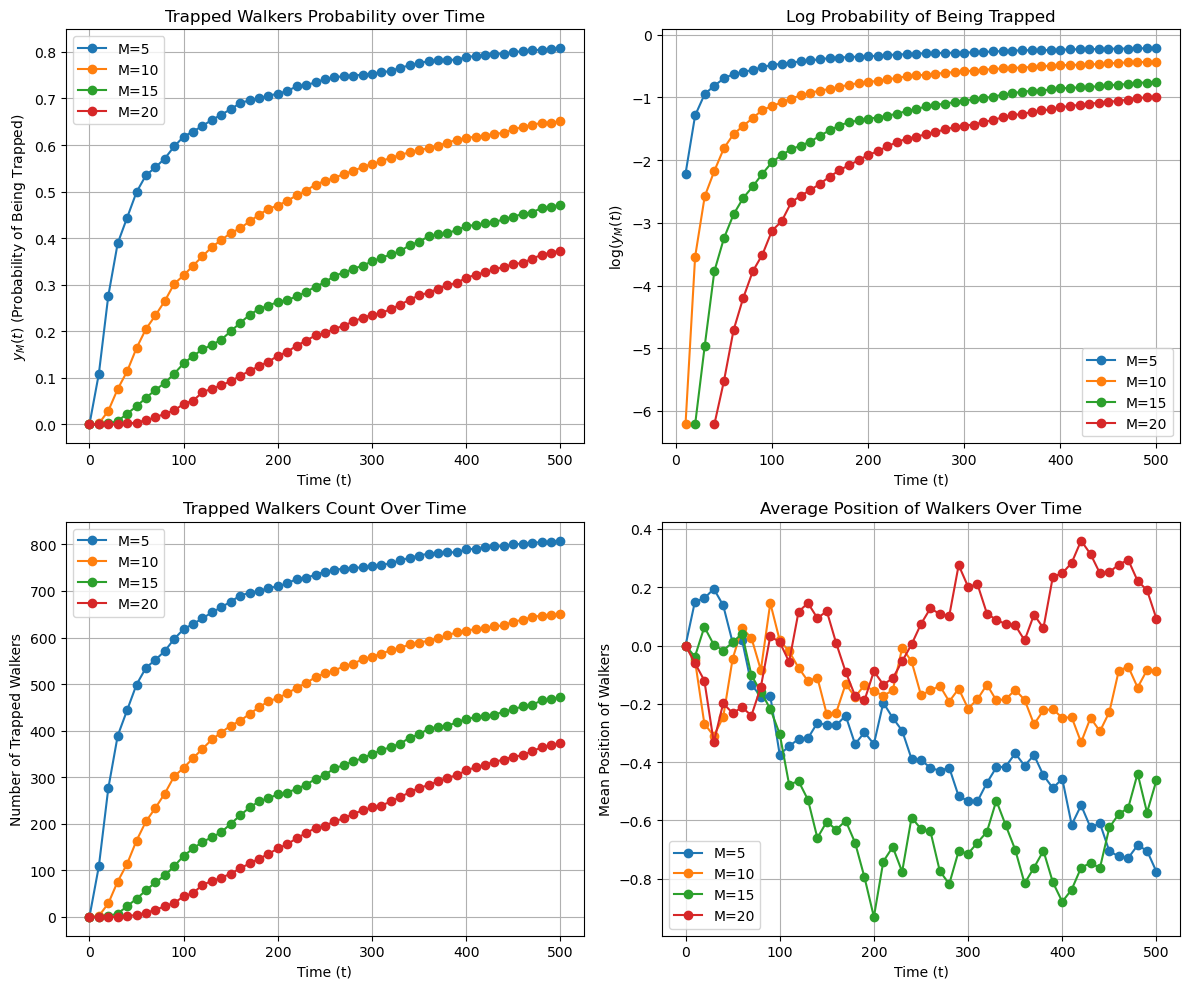

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
trap_positions = [5, 10, 15, 20]  # Different trap locations
num_walkers = 1000  # Number of independent random walkers
totTime = 500  # Total simulation time
num_print = 10  # Save data at every num_print steps

# Store results for different trap positions
results = {}

for M in trap_positions:
    walker_pos = np.zeros(num_walkers, dtype=int)  # All walkers start at x = 0
    trapped = np.zeros(num_walkers, dtype=bool)  # Track trapped walkers

    time_values = []
    trapped_probs = []
    log_trapped_probs = []
    num_trapped_list = []
    mean_positions = []

    # Time evolution
    for t in range(0, totTime + 1, num_print):
        if t > 0:  # Skip t=0 (initial state)
            for _ in range(num_print):  # Perform num_print steps
                steps = np.random.choice([-1, 1], size=num_walkers)  # Random steps
                walker_pos[~trapped] += steps[~trapped]  # Move only non-trapped walkers
                trapped[walker_pos >= M] = True  # Mark trapped walkers

        # Compute statistics
        numTrapped = np.sum(trapped)  # Number of trapped walkers
        probTrapped = numTrapped / num_walkers  # Probability of being trapped
        logProbTrapped = np.log(probTrapped) if probTrapped > 0 else np.nan  # Avoid log(0)
        meanPos = np.mean(walker_pos)  # Compute mean position

        # Store values
        time_values.append(t)
        trapped_probs.append(probTrapped)
        log_trapped_probs.append(logProbTrapped)
        num_trapped_list.append(numTrapped)
        mean_positions.append(meanPos)

    # Store results for this M
    results[M] = {
        "time": time_values,
        "trapped_probs": trapped_probs,
        "log_trapped_probs": log_trapped_probs,
        "num_trapped_list": num_trapped_list,
        "mean_positions": mean_positions
    }

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Probability of being trapped vs. time
for M in trap_positions:
    axs[0, 0].plot(results[M]["time"], results[M]["trapped_probs"], marker='o', linestyle='-', label=f"M={M}")
axs[0, 0].set_xlabel("Time (t)")
axs[0, 0].set_ylabel(r"$y_M(t)$ (Probability of Being Trapped)")
axs[0, 0].set_title("Trapped Walkers Probability over Time")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Log Probability of being trapped vs. time
for M in trap_positions:
    axs[0, 1].plot(results[M]["time"], results[M]["log_trapped_probs"], marker='o', linestyle='-', label=f"M={M}")
axs[0, 1].set_xlabel("Time (t)")
axs[0, 1].set_ylabel(r"$\log(y_M(t))$")
axs[0, 1].set_title("Log Probability of Being Trapped")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3: Number of trapped walkers vs. time
for M in trap_positions:
    axs[1, 0].plot(results[M]["time"], results[M]["num_trapped_list"], marker='o', linestyle='-', label=f"M={M}")
axs[1, 0].set_xlabel("Time (t)")
axs[1, 0].set_ylabel("Number of Trapped Walkers")
axs[1, 0].set_title("Trapped Walkers Count Over Time")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4: Mean walker position vs. time
for M in trap_positions:
    axs[1, 1].plot(results[M]["time"], results[M]["mean_positions"], marker='o', linestyle='-', label=f"M={M}")
axs[1, 1].set_xlabel("Time (t)")
axs[1, 1].set_ylabel("Mean Position of Walkers")
axs[1, 1].set_title("Average Position of Walkers Over Time")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

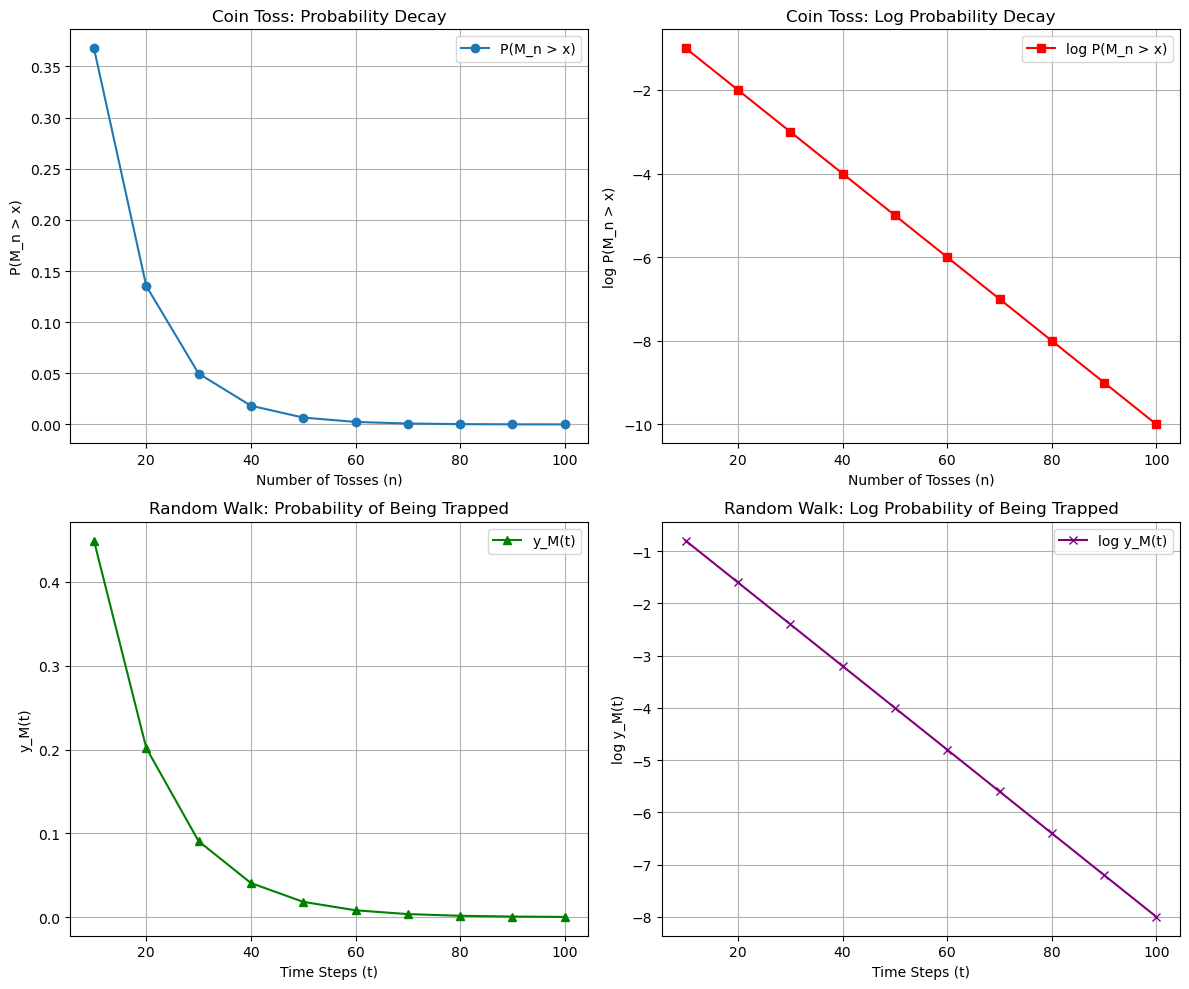

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (Replace with actual computed values)
n_values = np.arange(10, 101, 10)  # Number of tosses
prob_Mn_x = np.exp(-0.1 * n_values)  # Example exponential decay for Coin Toss
log_prob_Mn_x = np.log(prob_Mn_x)

t_values = np.arange(10, 101, 10)  # Time steps in Random Walk
y_M_t = np.exp(-0.08 * t_values)  # Example probability of being trapped
y_M_t_log = np.log(y_M_t)

# Create plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot P(M_n > x) vs n (Coin Toss)
axs[0, 0].plot(n_values, prob_Mn_x, marker='o', label='P(M_n > x)')
axs[0, 0].set_xlabel('Number of Tosses (n)')
axs[0, 0].set_ylabel('P(M_n > x)')
axs[0, 0].set_title('Coin Toss: Probability Decay')
axs[0, 0].legend()
axs[0, 0].grid()

# Plot log P(M_n > x) vs n (Coin Toss)
axs[0, 1].plot(n_values, log_prob_Mn_x, marker='s', label='log P(M_n > x)', color='r')
axs[0, 1].set_xlabel('Number of Tosses (n)')
axs[0, 1].set_ylabel('log P(M_n > x)')
axs[0, 1].set_title('Coin Toss: Log Probability Decay')
axs[0, 1].legend()
axs[0, 1].grid()

# Plot y_M(t) vs t (Random Walk)
axs[1, 0].plot(t_values, y_M_t, marker='^', label='y_M(t)', color='g')
axs[1, 0].set_xlabel('Time Steps (t)')
axs[1, 0].set_ylabel('y_M(t)')
axs[1, 0].set_title('Random Walk: Probability of Being Trapped')
axs[1, 0].legend()
axs[1, 0].grid()

# Plot log y_M(t) vs t (Random Walk)
axs[1, 1].plot(t_values, y_M_t_log, marker='x', label='log y_M(t)', color='purple')
axs[1, 1].set_xlabel('Time Steps (t)')
axs[1, 1].set_ylabel('log y_M(t)')
axs[1, 1].set_title('Random Walk: Log Probability of Being Trapped')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()

The relationship between Task 2 and Task 6 results are:-
1. Mapping between coin tosses and walk positions: the number of heads in n tosses determines how far the walker drifts in random walk. The probability of observing Mn > x in the coin toss problem is directly related to the probability of a walker reaching x in a given time.
2. Probability decay similarity: In coin toss problem, P decays exponentially as x increases. In random walk problem, the probability yM of reaching  M within time t also follows an exponential scaling for large M
3. The probability of reaching M within time t in Task 6 is given by
                    yM(t) ~= e^-cM^2/t
    This is similar to the tail probability in Task 2:
                    P(Mn > x) ~= e^-c'x
    Both have exponential decay with respect to their parameters (x in Task 2 and M in Task 6)